### Pandas Case Study 1 - Time Series Analysis

#### Timedelta Object (Pandas)


- Represents a duration, the difference between two dates or times.


- In pandas, a Timedelta object represents a duration, which is the difference between two dates, times, or a combination of both. 


- It is useful to work with time-based data and perform various time-related operations.


- We can create a Timedelta object using the pd.Timedelta constructor and provide the duration as an argument, which can be expressed in various units such as days, hours, minutes, seconds, milliseconds, microseconds, and nanoseconds.

In [1]:
import pandas as pd 
# Create Timedelta object using Timestamp object
td1 = pd.Timestamp('20th Oct 2023')
td2 = pd.Timestamp('20th Nov 2023')

# diff_td is Timedelta object
diff_td = td2 - td1
print(diff_td)

31 days 00:00:00


**pd.Timedelta(value, unit):**

- The pd.Timedelta() function in pandas is used to create a Timedelta object, which represents a duration or time difference.


- We can specify the duration as arguments to this function, using various units such as days, hours, minutes, seconds, milliseconds, microseconds, and nanoseconds.


- **Note:** Timedelta is the pandas equivalent of python’s datetime.timedelta and is interchangeable with it in most cases.


- **Syntax : pd.Timedelta(value, unit):**
    - **value:** The numerical value that represents the duration or time difference.
    - **unit:** A string that specifies the unit of time. This can be one of the following:
        - 'D' or 'days' for days
        - 'H' or 'hours' for hours
        - 'T' or 'minutes' for minutes
        - 'S' or 'seconds' for seconds
        - 'L' or 'milliseconds' for milliseconds
        - 'U' or 'microseconds' for microseconds
        - 'N' or 'nanoseconds' for nanoseconds

In [2]:
# standalone creation using pd.Timedelta()
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [3]:
# arithmetic operations
td = pd.Timedelta(days=10,hours=2)
new_date = pd.Timestamp('2023/08/20') + td
print(new_date)

2023-08-30 02:00:00


In [4]:
dates = pd.date_range(start='2023/10/18',
                      end='2023/10/25', freq='D')
td = pd.Timedelta(days=2,hours=10,minutes=35) 
print(dates + td)

DatetimeIndex(['2023-10-20 10:35:00', '2023-10-21 10:35:00',
               '2023-10-22 10:35:00', '2023-10-23 10:35:00',
               '2023-10-24 10:35:00', '2023-10-25 10:35:00',
               '2023-10-26 10:35:00', '2023-10-27 10:35:00'],
              dtype='datetime64[ns]', freq='D')


In [5]:
# real life example (90's delivery dataset)
df = pd.read_csv('deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [6]:
# Calculating avg time period of delivery
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
# Timedelta
df['delivery_time'] = df['delivery_date'] - df['order_date']
df['delivery_time'].mean() 

Timedelta('1217 days 22:53:53.532934128')

### Time Series

- A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

- Examples

    - Financial Data (Company stocks)
    - Natural Data (Rainfall measurement)
    - Event Data (Covid)
    - Medical Data (Heart rate monitoring)

- Types of Operations done on Time Series

    - Time Series Analysis
    - Time Series Forecasting

In [7]:
import pandas as pd
google = pd.read_csv('google.csv')

In [8]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [9]:
# Convert the 'Date' column to datetime
google['Date'] = pd.to_datetime(google['Date'])

In [10]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [11]:
# When you work on Time Series data then Make Date column as index
google.set_index('Date', inplace=True)

In [12]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [13]:
# fetch a specific date
google.loc['2004-08-19']

Open         4.981329e+01
High         5.183571e+01
Low          4.780083e+01
Close        4.998266e+01
Adj Close    4.998266e+01
Volume       4.487136e+07
Name: 2004-08-19 00:00:00, dtype: float64

In [14]:
# Partial indexing -> select a particular year/month
google.loc['2004-08']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252


In [15]:
google.loc['2022']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500
2022-01-07,2758.100098,2765.094971,2715.780029,2740.090088,2740.090088,970400
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [16]:
# Adding new cols
import pandas as pd

# Assuming 'google' is your DataFrame with a RangeIndex
# Convert the index to a DatetimeIndex
#google.index = pd.to_datetime(google.index)

# Add new columns based on date attributes
google['Month'] = google.index.month_name()
google['Day'] = google.index.day_name()
google['Quarter'] = google.index.quarter


In [17]:
google.head(10)

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620,August,Thursday,3
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,August,Friday,3
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498,August,Monday,3
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,August,Tuesday,3


In [18]:
# Slicing
# In loc include start and end
google.loc['2004-08-19':'2020-05-16':2]


,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,August,Friday,3
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,August,Tuesday,3
...,...,...,...,...,...,...,...,...,...
2020-05-05,1337.920044,1373.939941,1337.459961,1351.109985,1351.109985,1651500,May,Tuesday,2
2020-05-07,1365.939941,1377.599976,1355.270020,1372.560059,1372.560059,1397600,May,Thursday,2
2020-05-11,1378.280029,1416.530029,1377.151978,1403.260010,1403.260010,1412100,May,Monday,2


**DateOffset() method:**
- In Pandas, you can use the dateOffset class to represent various date offsets or date-related calculations. Date offsets allow you to perform operations like adding or subtracting a specific number of days, months, years, hours, minutes, or other time units from a date or time.

- The DateOffset class is part of the Pandas library and is found in the pandas.tseries.offsets module. You can use it to create date offsets and apply them to date or datetime objects.

- Here are some common date offsets in Pandas:
     - **Day:** Represents a day offset.
     - **BusinessDay:** Represents a business day (excluding weekends) offset.
     - **Week:** Represents a week offset.
     - **MonthEnd:** Represents the last day of a month.
     - **YearEnd:** Represents the last day of a year.
     - **Hour:** Represents an hour offset.
     - **Minute:** Represents a minute offset.

In [19]:
import pandas as pd
from pandas.tseries.offsets import Day
# Create a date offset of 3 days
offset = Day(3)
# Create a date
date = pd.to_datetime('2023-10-26')
# Add the offset to the date
new_date = date + offset
print(new_date)

2023-10-29 00:00:00


In [20]:
# Challege -> fetch info for a particlular date every year -> limitation of timedelta
time = pd.date_range(start='2005-1-8', end='2022-1-6', freq=pd.DateOffset(years=1))
google[google.index.isin(time)]


,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2007-01-08,242.934418,244.020355,240.199677,240.887100,240.887100,9544441,January,Monday,1
2008-01-08,325.280762,328.747772,314.321838,314.660583,314.660583,10718225,January,Tuesday,1
2009-01-08,158.545731,161.987823,158.077484,161.987823,161.987823,7228393,January,Thursday,1
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016,January,Friday,1
2013-01-08,366.396667,366.775238,360.862396,365.280823,365.280823,3364765,January,Tuesday,1
2014-01-08,570.860291,571.517822,564.528992,568.484192,568.484192,4501811,January,Wednesday,1
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582,January,Thursday,1
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,January,Friday,1
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600,January,Monday,1


<AxesSubplot: xlabel='Date'>

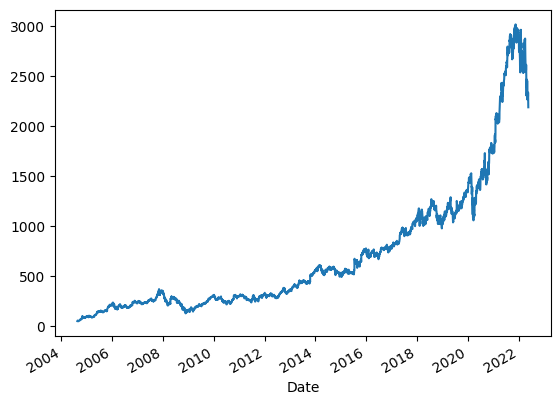

In [21]:
google['Close'].plot()

<AxesSubplot: xlabel='Date'>

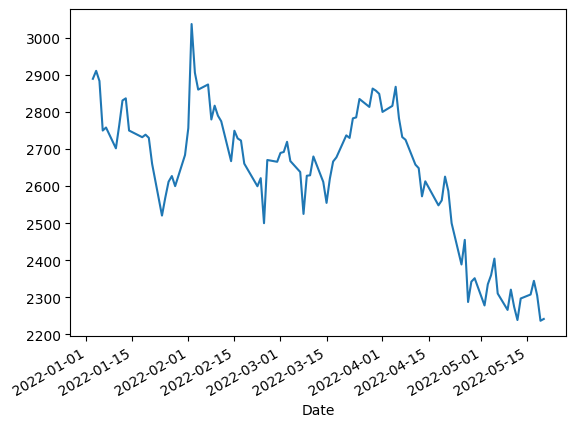

In [22]:
# Plot particular year/month/week
google.loc['2022']['Open'].plot()

<AxesSubplot: xlabel='Date'>

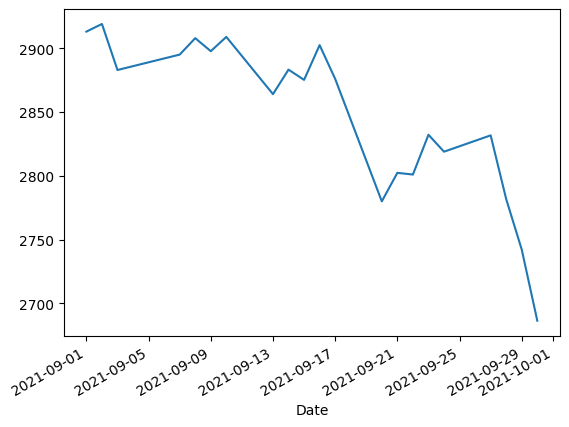

In [23]:
# Month trend
google.loc['2021-9']['Open'].plot()

**frequncey:**

In [24]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

**asfreq() method:** (Controling the frequency fo time series data)
- In Pandas, the asfreq method is used to resample time series data. Resampling is the process of changing the frequency of the data in a time series, which means converting it from one frequency (e.g., daily) to another frequency (e.g., monthly or quarterly). 

- The asfreq method is particularly useful for time series data that's indexed with a DatetimeIndex or PeriodIndex.

- The asfreq method allows you to specify the desired frequency (or frequency rule) to which you want to resample your data. It's a common tool for time series data analysis and manipulation. Here's the basic syntax:

- **Syntax: DataFrame.asfreq(freq, method=None, how=None, normalize=False)**

     - **freq:** The frequency to which you want to resample the data, specified as a string (e.g., 'D' for daily, 'M' for monthly).
     - **method:** This is an optional parameter that specifies how to handle missing data when resampling. It can take values like 'pad' or 'ffill' (forward fill), 'bfill' (backward fill), 'nearest', or None. This parameter determines how missing values are filled.
     - **how:** This is an optional parameter, and it's mainly used for PeriodIndex. It allows you to specify whether the resampling should be done at the start or end of the period. It can take values like 'start' or 'end'.
     - **normalize:** This is an optional parameter that, when set to True, ensures that the resulting DatetimeIndex is in a normalized form. For example, when resampling to a monthly frequency, if normalize is True, the resulting dates will always have day 1.

In [25]:
import pandas as pd
import numpy as np
# Create a sample time series
date_rng = pd.date_range(start='2023-01-01', 
                         end='2023-01-10', freq='D')
data = np.arange(len(date_rng))
df = pd.DataFrame({'Date': date_rng, 'Data': data})
# Resample the data to a weekly frequency
weekly_data = df.set_index('Date').asfreq('W')
print(weekly_data)

            Data
Date            
2023-01-01     0
2023-01-08     7


In [26]:
google.asfreq('D')# Days
google.asfreq('B')#Business dat
google.asfreq('Q')
google.asfreq('Y')# Year
google.asfreq('M') # Month


,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252.0,August,Tuesday,3.0
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday,3.0
2004-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-30,90.017593,91.158318,89.788452,90.650223,90.650223,15457723.0,November,Tuesday,4.0
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
...,...,...,...,...,...,...,...,...,...
2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864900.0,December,Friday,4.0
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800.0,January,Monday,1.0
2022-02-28,2665.689941,2712.810059,2656.504883,2697.820068,2697.820068,1483800.0,February,Monday,1.0


<AxesSubplot: xlabel='Quarter'>

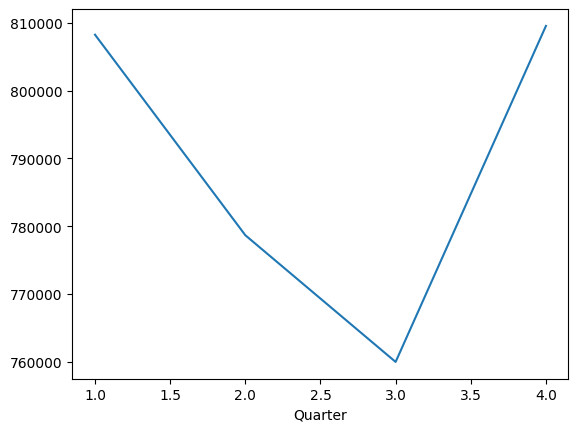

In [27]:
# quaterly trend
google.groupby('Quarter')['Open'].sum().plot()

Month
April        AxesSubplot(0.125,0.2;0.775x0.68)
August       AxesSubplot(0.125,0.2;0.775x0.68)
December     AxesSubplot(0.125,0.2;0.775x0.68)
February     AxesSubplot(0.125,0.2;0.775x0.68)
January      AxesSubplot(0.125,0.2;0.775x0.68)
July         AxesSubplot(0.125,0.2;0.775x0.68)
June         AxesSubplot(0.125,0.2;0.775x0.68)
March        AxesSubplot(0.125,0.2;0.775x0.68)
May          AxesSubplot(0.125,0.2;0.775x0.68)
November     AxesSubplot(0.125,0.2;0.775x0.68)
October      AxesSubplot(0.125,0.2;0.775x0.68)
September    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

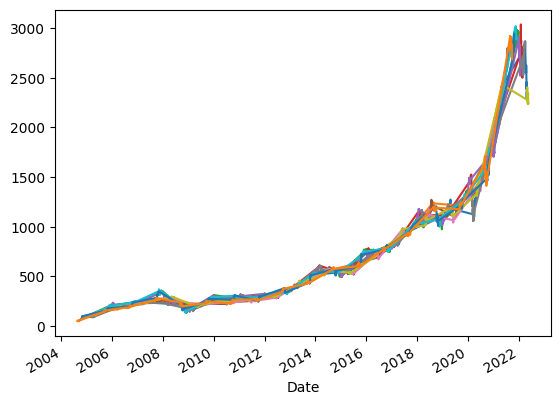

In [28]:
# Montly trend
google.groupby('Month')['Open'].plot()

In [ ]:
# viz all cols together

### Resampling
- Resampling involves changing the frequency of your time series observations.

**Two types of resampling are:**

- **Upsampling**: 
    - Where you increase the frequency of the samples, such as from minutes to seconds.
    - Used in rare cases
- **Downsampling**: 
    - Where you decrease the frequency of the samples, such as from days to months.
    - Used in most of the time

In [38]:
# Downloading
# Here somany noise are here because of noise we can't find out pattren

<AxesSubplot: xlabel='Date'>

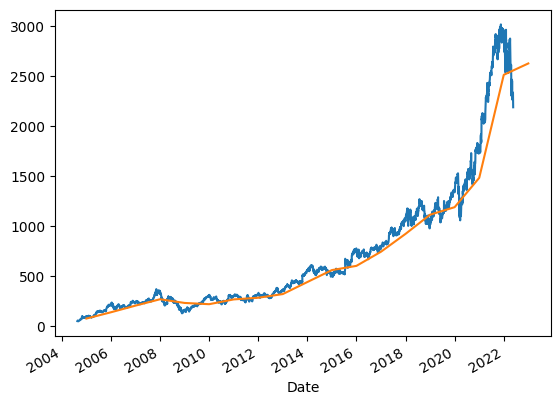

In [42]:
google['Close'].plot()
google['Close'].resample('Y').mean().plot()

<AxesSubplot: xlabel='Date'>

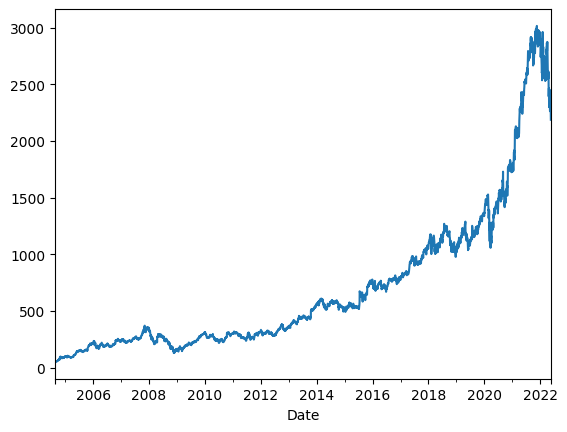

In [56]:
# Upsampling > increase in frequency
# Opposite to Downsampling
google['Close'].resample('12H').interpolate(method='linear', order=2).plot()

### Rolling Window(Smoothing)
- Time series data in original format can be quite volatile, especially on smaller aggregation levels. 
- The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

In [62]:
# Normal
google['Close']

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2022-05-16    2295.850098
2022-05-17    2334.030029
2022-05-18    2248.020020
2022-05-19    2214.909912
2022-05-20    2186.260010
Name: Close, Length: 4471, dtype: float64

<AxesSubplot: xlabel='Date'>

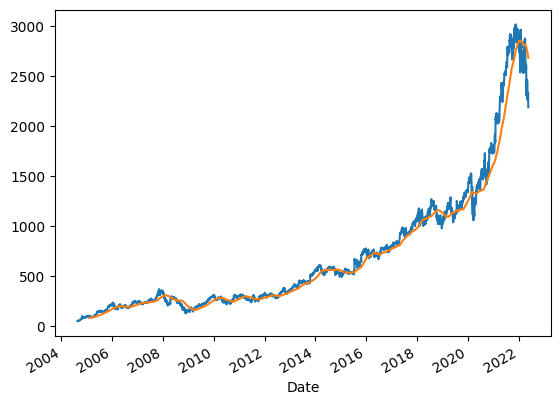

In [71]:
# Rolling/Moving average
google['Close'].plot()
google['Close'].rolling(120).mean().plot()

<AxesSubplot: xlabel='Date'>

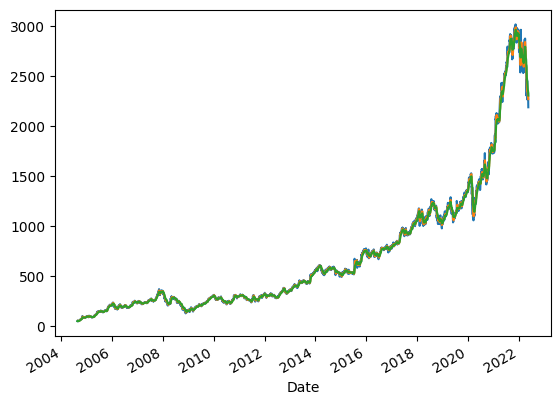

In [75]:
# Expotenial Moving Average
google['Close'].plot()
google['Close'].rolling(7).mean().plot()
google['Close'].ewm(7).mean().plot()

### Shifting
- The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [80]:
google['Open']

Date
2004-08-19      49.813290
2004-08-20      50.316402
2004-08-23      55.168217
2004-08-24      55.412300
2004-08-25      52.284027
                 ...     
2022-05-16    2307.679932
2022-05-17    2344.550049
2022-05-18    2304.750000
2022-05-19    2236.820068
2022-05-20    2241.709961
Name: Open, Length: 4471, dtype: float64

In [79]:
google['Open'].shift(1)

Date
2004-08-19            NaN
2004-08-20      49.813290
2004-08-23      50.316402
2004-08-24      55.168217
2004-08-25      55.412300
                 ...     
2022-05-16    2296.909912
2022-05-17    2307.679932
2022-05-18    2344.550049
2022-05-19    2304.750000
2022-05-20    2236.820068
Name: Open, Length: 4471, dtype: float64

In [81]:
google['Open'].shift(2)

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      49.813290
2004-08-24      50.316402
2004-08-25      55.168217
                 ...     
2022-05-16    2238.760010
2022-05-17    2296.909912
2022-05-18    2307.679932
2022-05-19    2344.550049
2022-05-20    2304.750000
Name: Open, Length: 4471, dtype: float64

In [82]:
google['Open'].shift(5)

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2022-05-16    2266.070068
2022-05-17    2320.810059
2022-05-18    2274.209961
2022-05-19    2238.760010
2022-05-20    2296.909912
Name: Open, Length: 4471, dtype: float64

In [83]:
google['Open'].shift(-5)

Date
2004-08-19    52.279045
2004-08-20    53.848164
2004-08-23    52.443428
2004-08-24    50.958992
2004-08-25    51.158245
                ...    
2022-05-16          NaN
2022-05-17          NaN
2022-05-18          NaN
2022-05-19          NaN
2022-05-20          NaN
Name: Open, Length: 4471, dtype: float64

In [96]:
# shift example
df = pd.read_csv('login.csv',header=None)
df = df[[1,2]]
df.rename(columns={1:'user_id',2:'login_time'}, inplace=True)
df

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


In [97]:
df['user_id'].value_counts()

413     222
458     208
492     162
882     140
592     122
       ... 
1043      1
1045      1
1047      1
1048      1
880       1
Name: user_id, Length: 433, dtype: int64

In [113]:
user_df = df[df['user_id'] == 592]
user_df.head()

,user_id,login_time
4,592,2017-01-07 19:09:59
6,592,2017-01-08 09:14:27
7,592,2017-01-08 11:18:08
13,592,2017-01-09 12:47:22
20,592,2017-01-09 16:31:07


In [114]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 4 to 2949
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     122 non-null    int64 
 1   login_time  122 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [115]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_10740\3275549453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [116]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 4 to 2949
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     122 non-null    int64         
 1   login_time  122 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [117]:
user_df['shifted'] = user_df['login_time'].shift(1)

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_10740\3509294578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


In [118]:
user_df

,user_id,login_time,shifted
4,592,2017-01-07 19:09:59,NaT
6,592,2017-01-08 09:14:27,2017-01-07 19:09:59
7,592,2017-01-08 11:18:08,2017-01-08 09:14:27
13,592,2017-01-09 12:47:22,2017-01-08 11:18:08
20,592,2017-01-09 16:31:07,2017-01-09 12:47:22
...,...,...,...
2851,592,2017-12-18 10:09:19,2017-12-16 14:50:52
2855,592,2017-12-18 15:45:53,2017-12-18 10:09:19
2856,592,2017-12-18 16:25:28,2017-12-18 15:45:53
2925,592,2017-12-26 10:32:00,2017-12-18 16:25:28


In [119]:
(user_df['login_time'] - user_df['shifted']).mean()

Timedelta('2 days 22:24:23.157024793')